In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [4]:
dataset_path = "C:\\Users\\ASUS\\Desktop\\pestvs\\pest"


In [50]:

# Step 4: Data Preprocessing
# Split data into Training (80%) & Validation (20%) using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6121 images belonging to 13 classes.
Found 1525 images belonging to 13 classes.


In [51]:
# Step 5: Build the CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),  # Prevent overfitting
    keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output classes
])


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Step 6: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
# Step 7: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increase for better accuracy
    verbose=1
)


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 128s 656ms/step - accuracy: 0.2890 - loss: 2.3509 - val_accuracy: 0.4026 - val_loss: 1.7816
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 86s 450ms/step - accuracy: 0.3880 - loss: 1.8126 - val_accuracy: 0.4459 - val_loss: 1.6530
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 105s 550ms/step - accuracy: 0.4349 - loss: 1.7107 - val_accuracy: 0.4393 - val_loss: 1.6307
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 126s 659ms/step - accuracy: 0.4610 - loss: 1.6215 - val_accuracy: 0.4826 - val_loss: 1.5944
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 179s 932ms/step - accuracy: 0.4655 - loss: 1.6072 - val_accuracy: 0.4767 - val_loss: 1.5483
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 88s 458ms/step - accuracy: 0.5090 - loss: 1.4956 - val_accuracy: 0.4977 - val_loss: 1.4975
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 89s 464ms/step - accuracy: 0.5030 - loss: 1.5086 - val_accuracy: 0.4977 - val_loss: 1.4844
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 94s 491ms/step - accuracy: 0.5233 - los

In [54]:

# Define the path to the folder where you want to save the model
save_path = "C:\\Users\\ASUS\\Desktop\\pestvs\\pest\\pest_detection_model.h5"

In [56]:
# Save the model
model.save(save_path)

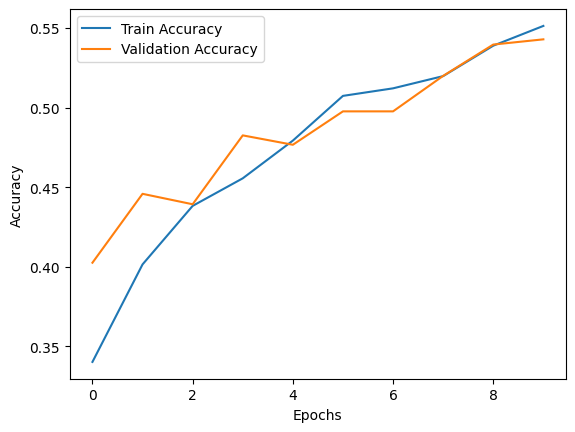

In [57]:
# Step 9: Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()